<a href="https://colab.research.google.com/github/marcellinus-witarsah/dogs-vs-cats-model/blob/main/dogs-vs-cats-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs Cats Model 
This project is based on competition from Kaggle which can be accessed using this link https://www.kaggle.com/competitions/dogs-vs-cats. This project aimed to create a model that can classify dogs and cats 

In [25]:
import os
import shutil
import sys
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16

Run this code when using Google Colab, but you need a kaggle.json which is an authentication for downloading the dataset using Kaggle API. But when you run on the local computer (Windows) you need to put the kaggle.json API in this path "C:\Users<Windows-username>.kaggle\kaggle.json".

In [13]:
# # code for making ensuring kaggle.json existed
# kaggle_json_folder = os.path.join('/root/.kaggle')

# if not os.path.exists(kaggle_json_folder):
#     os.mkdir(path=kaggle_json_folder)
#     print(kaggle_json_folder + " has been created")
# else:
#     print(kaggle_json_folder + " already exists.")

# try:
#     source = os.path.join('/content/kaggle.json')
#     target = os.path.join(kaggle_json_folder, 'kaggle.json')
#     shutil.copy(source, target)
#     print("file copied")
# except IOError as e:
#     print("Unable to copy file. %s" % e)
# except:
#     print("Unexpected error:", sys.exc_info())

## Data Preparation

Pull data from Kaggle using ***kaggle.json*** as its authentication token. Please make sure you have it inside ***/root/.kaggle/kaggle.json*** or ***C:/Users<Windows-username>/.kaggle/kaggle.json*** 

In [14]:
# download the data
!pip install kaggle
!kaggle competitions download -c dogs-vs-cats



  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<02:47, 5.07MB/s]
  0%|          | 2.00M/812M [00:00<02:27, 5.76MB/s]
  0%|          | 3.00M/812M [00:00<02:20, 6.02MB/s]
  0%|          | 4.00M/812M [00:00<02:30, 5.64MB/s]
  1%|          | 5.00M/812M [00:01<05:39, 2.49MB/s]
  1%|          | 6.00M/812M [00:01<04:27, 3.16MB/s]
  1%|          | 7.00M/812M [00:01<03:41, 3.80MB/s]
  1%|          | 8.00M/812M [00:02<03:13, 4.35MB/s]
  1%|1         | 9.00M/812M [00:02<02:56, 4.77MB/s]
  1%|1         | 10.0M/812M [00:02<02:36, 5.37MB/s]
  1%|1         | 11.0M/812M [00:02<02:30, 5.59MB/s]
  1%|1         | 12.0M/812M [00:02<02:28, 5.66MB/s]
  2%|1         | 13.0M/812M [00:02<02:25, 5.74MB/s]
  2%|1         | 14.0M/812M [00:03<02:18, 6.03MB/s]
  2%|1         | 15.0M/812M [00:03<02:15, 6.18MB/s]
  2%|1         | 16.0M/812M [00:03<02:15, 6.18MB/s]
  2%|2         | 17.0M/812M [00:03<02:12, 6.28MB/s]
  2%|2         | 18.0M/812M [00:03<02:18, 6.03MB/s]
  2%|2         | 19.

 39%|###8      | 315M/812M [01:11<01:48, 4.78MB/s]
 39%|###8      | 316M/812M [01:11<01:54, 4.52MB/s]
 39%|###9      | 317M/812M [01:11<01:55, 4.50MB/s]
 39%|###9      | 318M/812M [01:12<03:00, 2.87MB/s]
 39%|###9      | 319M/812M [01:13<03:31, 2.44MB/s]
 39%|###9      | 320M/812M [01:13<03:31, 2.44MB/s]
 40%|###9      | 321M/812M [01:13<03:03, 2.81MB/s]
 40%|###9      | 322M/812M [01:14<02:45, 3.11MB/s]
 40%|###9      | 323M/812M [01:14<02:41, 3.18MB/s]
 40%|###9      | 324M/812M [01:14<02:44, 3.12MB/s]
 40%|####      | 325M/812M [01:15<02:50, 2.99MB/s]
 40%|####      | 326M/812M [01:15<02:48, 3.03MB/s]
 40%|####      | 327M/812M [01:15<02:32, 3.33MB/s]
 40%|####      | 328M/812M [01:15<02:17, 3.68MB/s]
 41%|####      | 329M/812M [01:16<02:03, 4.11MB/s]
 41%|####      | 330M/812M [01:16<01:50, 4.59MB/s]
 41%|####      | 331M/812M [01:16<01:43, 4.89MB/s]
 41%|####      | 332M/812M [01:16<01:33, 5.39MB/s]
 41%|####1     | 333M/812M [01:16<01:33, 5.39MB/s]
 41%|####1     | 334M/812M [01:

unzip the file and put it inside ***/dataset folder***

In [15]:
# # open the dogs-vs-cats.zip file
# from zipfile import ZipFile

# def extract_zip(filepath):
#     """
#     Function to open a extract zipped file
#     """
#     # opening the zip file in READ mode
#     with ZipFile(filepath, 'r') as zip:
#         #printing all the contents of the zip file
#         zip.printdir()
#         # extracting all the files
#         print('Extracting all the files now...')
#         zip.extractall(path=os.path.join(dataset_dir))
#         print('Done!')

# # specifying the zip file name
# file_name = "dogs-vs-cats.zip"

# dataset_dir = os.path.join("dataset")
# if not os.path.exists(dataset_dir):
#     os.mkdir(dataset_dir)
#     print(dataset_dir + " has been created")
    
# else:
#     print(dataset_dir + " already exists")

# if not os.path.exists(os.path.join(dataset_dir, file_name)):
#     shutil.move(file_name, dataset_dir)
# else:
#     print("data has already been moved")

# # opening the zip file in READ mode
# extract_zip(os.path.join(dataset_dir, file_name))
# extract_zip(os.path.join(dataset_dir, "train.zip"))
# extract_zip(os.path.join(dataset_dir, "test1.zip"))
# # remove the zip file
# os.remove(os.path.join(dataset_dir, file_name))
# os.remove(os.path.join(dataset_dir, "train.zip"))
# os.remove(os.path.join(dataset_dir, "test1.zip"))


dataset has been created
File Name                                             Modified             Size
sampleSubmission.csv                           2019-12-11 04:17:58        88903
test1.zip                                      2019-12-11 04:18:02    284321224
train.zip                                      2019-12-11 04:18:34    569546721
Extracting all the files now...
Done!
File Name                                             Modified             Size
train/                                         2013-09-20 10:12:24            0
train/cat.0.jpg                                2013-09-20 10:05:42        12414
train/cat.1.jpg                                2013-09-20 10:05:42        16880
train/cat.10.jpg                               2013-09-20 10:05:42        34315
train/cat.100.jpg                              2013-09-20 10:05:42        28377
train/cat.1000.jpg                             2013-09-20 10:05:42         5944
train/cat.10000.jpg                            2013-09-20

train/cat.1721.jpg                             2013-09-20 10:07:34         7140
train/cat.1722.jpg                             2013-09-20 10:07:34        10837
train/cat.1723.jpg                             2013-09-20 10:07:34        16062
train/cat.1724.jpg                             2013-09-20 10:07:34        13538
train/cat.1725.jpg                             2013-09-20 10:07:34        18406
train/cat.1726.jpg                             2013-09-20 10:07:34         3160
train/cat.1727.jpg                             2013-09-20 10:07:34         9966
train/cat.1728.jpg                             2013-09-20 10:07:34        24084
train/cat.1729.jpg                             2013-09-20 10:07:34        32872
train/cat.173.jpg                              2013-09-20 10:07:34        37853
train/cat.1730.jpg                             2013-09-20 10:07:34        26905
train/cat.1731.jpg                             2013-09-20 10:07:34        12458
train/cat.1732.jpg                      

train/cat.4420.jpg                             2013-09-20 10:09:06         3926
train/cat.4421.jpg                             2013-09-20 10:09:06        26357
train/cat.4422.jpg                             2013-09-20 10:09:06        28419
train/cat.4423.jpg                             2013-09-20 10:09:06        30804
train/cat.4424.jpg                             2013-09-20 10:09:06        19351
train/cat.4425.jpg                             2013-09-20 10:09:06        18940
train/cat.4426.jpg                             2013-09-20 10:09:06        31262
train/cat.4427.jpg                             2013-09-20 10:09:06        24950
train/cat.4428.jpg                             2013-09-20 10:09:06        12840
train/cat.4429.jpg                             2013-09-20 10:09:06        12987
train/cat.443.jpg                              2013-09-20 10:09:06        27769
train/cat.4430.jpg                             2013-09-20 10:09:06        29337
train/cat.4431.jpg                      

train/cat.7571.jpg                             2013-09-20 10:10:56        17402
train/cat.7572.jpg                             2013-09-20 10:10:56        28028
train/cat.7573.jpg                             2013-09-20 10:10:56        10429
train/cat.7574.jpg                             2013-09-20 10:10:56         5127
train/cat.7575.jpg                             2013-09-20 10:10:58        24715
train/cat.7576.jpg                             2013-09-20 10:10:58        17807
train/cat.7577.jpg                             2013-09-20 10:10:58        28876
train/cat.7578.jpg                             2013-09-20 10:10:58         9320
train/cat.7579.jpg                             2013-09-20 10:10:58        29222
train/cat.758.jpg                              2013-09-20 10:10:58         7116
train/cat.7580.jpg                             2013-09-20 10:10:58        28569
train/cat.7581.jpg                             2013-09-20 10:10:58        13566
train/cat.7582.jpg                      

train/dog.10719.jpg                            2013-09-20 09:59:08        33309
train/dog.1072.jpg                             2013-09-20 09:59:08        21303
train/dog.10720.jpg                            2013-09-20 09:59:08        17233
train/dog.10721.jpg                            2013-09-20 09:59:08         8527
train/dog.10722.jpg                            2013-09-20 09:59:08        29525
train/dog.10723.jpg                            2013-09-20 09:59:08        36398
train/dog.10724.jpg                            2013-09-20 09:59:08        12277
train/dog.10725.jpg                            2013-09-20 09:59:08        19405
train/dog.10726.jpg                            2013-09-20 09:59:08         3909
train/dog.10727.jpg                            2013-09-20 09:59:08        25811
train/dog.10728.jpg                            2013-09-20 09:59:08        28195
train/dog.10729.jpg                            2013-09-20 09:59:08         2743
train/dog.1073.jpg                      

train/dog.262.jpg                              2013-09-20 10:01:12        22928
train/dog.2620.jpg                             2013-09-20 10:01:12        46926
train/dog.2621.jpg                             2013-09-20 10:01:12        22927
train/dog.2622.jpg                             2013-09-20 10:01:12        25201
train/dog.2623.jpg                             2013-09-20 10:01:12        17476
train/dog.2624.jpg                             2013-09-20 10:01:12        12410
train/dog.2625.jpg                             2013-09-20 10:01:12        21862
train/dog.2626.jpg                             2013-09-20 10:01:12        28501
train/dog.2627.jpg                             2013-09-20 10:01:12        17519
train/dog.2628.jpg                             2013-09-20 10:01:12         8964
train/dog.2629.jpg                             2013-09-20 10:01:12        35545
train/dog.263.jpg                              2013-09-20 10:01:12        22983
train/dog.2630.jpg                      

train/dog.577.jpg                              2013-09-20 10:03:04        16014
train/dog.5770.jpg                             2013-09-20 10:03:04        32282
train/dog.5771.jpg                             2013-09-20 10:03:04        36846
train/dog.5772.jpg                             2013-09-20 10:03:04        33030
train/dog.5773.jpg                             2013-09-20 10:03:04        31980
train/dog.5774.jpg                             2013-09-20 10:03:04        48463
train/dog.5775.jpg                             2013-09-20 10:03:04        16530
train/dog.5776.jpg                             2013-09-20 10:03:04        21998
train/dog.5777.jpg                             2013-09-20 10:03:04        17264
train/dog.5778.jpg                             2013-09-20 10:03:04        13246
train/dog.5779.jpg                             2013-09-20 10:03:04        21066
train/dog.578.jpg                              2013-09-20 10:03:04        28520
train/dog.5780.jpg                      

train/dog.937.jpg                              2013-09-20 10:05:16        22922
train/dog.9370.jpg                             2013-09-20 10:05:16        11723
train/dog.9371.jpg                             2013-09-20 10:05:16        15372
train/dog.9372.jpg                             2013-09-20 10:05:16        19227
train/dog.9373.jpg                             2013-09-20 10:05:16        27704
train/dog.9374.jpg                             2013-09-20 10:05:16        16105
train/dog.9375.jpg                             2013-09-20 10:05:16        27376
train/dog.9376.jpg                             2013-09-20 10:05:16         6948
train/dog.9377.jpg                             2013-09-20 10:05:16         9361
train/dog.9378.jpg                             2013-09-20 10:05:16        17650
train/dog.9379.jpg                             2013-09-20 10:05:16        16859
train/dog.938.jpg                              2013-09-20 10:05:16        29074
train/dog.9380.jpg                      

Done!
File Name                                             Modified             Size
test1/                                         2013-09-20 10:19:28            0
test1/1.jpg                                    2013-09-20 10:12:24        24178
test1/10.jpg                                   2013-09-20 10:12:24        22194
test1/100.jpg                                  2013-09-20 10:12:26        25445
test1/1000.jpg                                 2013-09-20 10:12:54        33518
test1/10000.jpg                                2013-09-20 10:18:02        54902
test1/10001.jpg                                2013-09-20 10:18:02        21671
test1/10002.jpg                                2013-09-20 10:18:02        28895
test1/10003.jpg                                2013-09-20 10:18:02        40146
test1/10004.jpg                                2013-09-20 10:18:02        21252
test1/10005.jpg                                2013-09-20 10:18:02         8888
test1/10006.jpg                   

test1/11614.jpg                                2013-09-20 10:18:56        10947
test1/11615.jpg                                2013-09-20 10:18:56        10759
test1/11616.jpg                                2013-09-20 10:18:56        24496
test1/11617.jpg                                2013-09-20 10:18:56        16793
test1/11618.jpg                                2013-09-20 10:18:56        12189
test1/11619.jpg                                2013-09-20 10:18:56        14633
test1/1162.jpg                                 2013-09-20 10:13:00        31920
test1/11620.jpg                                2013-09-20 10:18:56        20938
test1/11621.jpg                                2013-09-20 10:18:56        41034
test1/11622.jpg                                2013-09-20 10:18:56        45311
test1/11623.jpg                                2013-09-20 10:18:56        24094
test1/11624.jpg                                2013-09-20 10:18:56        10354
test1/11625.jpg                         

test1/2702.jpg                                 2013-09-20 10:13:48        26301
test1/2703.jpg                                 2013-09-20 10:13:50        32454
test1/2704.jpg                                 2013-09-20 10:13:50         6550
test1/2705.jpg                                 2013-09-20 10:13:50        25835
test1/2706.jpg                                 2013-09-20 10:13:50         5241
test1/2707.jpg                                 2013-09-20 10:13:50        22153
test1/2708.jpg                                 2013-09-20 10:13:50        31380
test1/2709.jpg                                 2013-09-20 10:13:50        14773
test1/271.jpg                                  2013-09-20 10:12:32        44089
test1/2710.jpg                                 2013-09-20 10:13:50        24432
test1/2711.jpg                                 2013-09-20 10:13:50        12077
test1/2712.jpg                                 2013-09-20 10:13:50         4435
test1/2713.jpg                          

test1/5313.jpg                                 2013-09-20 10:15:20         2035
test1/5314.jpg                                 2013-09-20 10:15:20        22680
test1/5315.jpg                                 2013-09-20 10:15:20        19783
test1/5316.jpg                                 2013-09-20 10:15:20        21720
test1/5317.jpg                                 2013-09-20 10:15:20        30857
test1/5318.jpg                                 2013-09-20 10:15:20        25068
test1/5319.jpg                                 2013-09-20 10:15:20        11177
test1/532.jpg                                  2013-09-20 10:12:40         3046
test1/5320.jpg                                 2013-09-20 10:15:20        29060
test1/5321.jpg                                 2013-09-20 10:15:20        23717
test1/5322.jpg                                 2013-09-20 10:15:20        10527
test1/5323.jpg                                 2013-09-20 10:15:20        35033
test1/5324.jpg                          

test1/8012.jpg                                 2013-09-20 10:16:52        27900
test1/8013.jpg                                 2013-09-20 10:16:52        12743
test1/8014.jpg                                 2013-09-20 10:16:52        35630
test1/8015.jpg                                 2013-09-20 10:16:52        25447
test1/8016.jpg                                 2013-09-20 10:16:52        27169
test1/8017.jpg                                 2013-09-20 10:16:52         8396
test1/8018.jpg                                 2013-09-20 10:16:52        22734
test1/8019.jpg                                 2013-09-20 10:16:52        34278
test1/802.jpg                                  2013-09-20 10:12:48        26168
test1/8020.jpg                                 2013-09-20 10:16:52        21044
test1/8021.jpg                                 2013-09-20 10:16:52        38736
test1/8022.jpg                                 2013-09-20 10:16:52        23151
test1/8023.jpg                          

Done!


## Data Exploration
Exploring the data by seeing the image

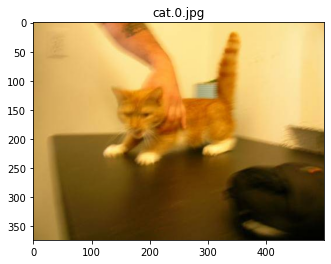

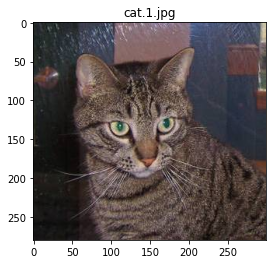

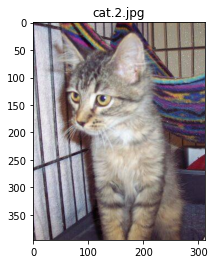

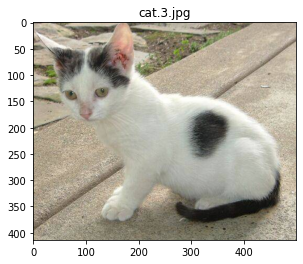

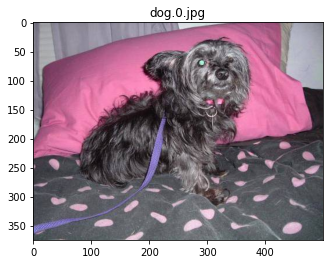

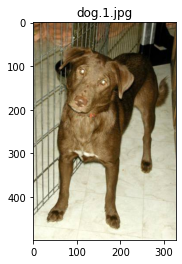

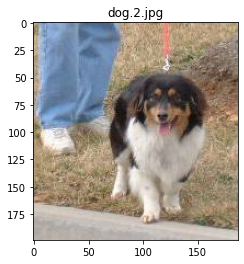

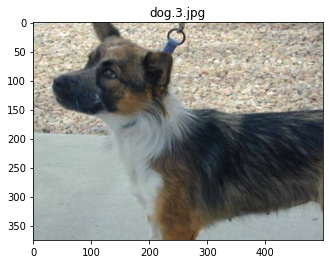

In [19]:
cat_filenames = ['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg']
dog_filenames = ['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg']

for filename in cat_filenames:
    plt.title(filename)
    img = plt.imread(os.path.join(os.getcwd(), 'dataset', 'train', filename))
    plt.imshow(img)
    plt.show()

for filename in dog_filenames:
    plt.title(filename)
    img = plt.imread(os.path.join(os.getcwd(), 'dataset', 'train', filename))
    plt.imshow(img)
    plt.show()

## Data Augmentation
Data augmentationis used to new data of image using different orientation. 

In [22]:
# # Create folder based on labels of the data which is cat and dog
# # folders
# train_folder = os.path.join(os.getcwd(), 'dataset', 'train')
# test1_folder = os.path.join(os.getcwd(), 'dataset', 'test1')

# # filename
# cat_folder_name = 'cat'
# dog_folder_name = 'dog'

# cat_path = os.path.join(train_folder, cat_folder_name)
# dog_path = os.path.join(train_folder, dog_folder_name)


# def create_folder(path):
#     if not os.path.exists(path):
#         os.mkdir(path=path)
#         print(path + " has been created")
#     else:
#         print(path + " already exists.")

# create_folder(cat_path)
# create_folder(dog_path)

# for file_name in os.listdir(train_folder):
#     destination = os.path.join(train_folder, file_name.split('.')[0], file_name)
#     source = os.path.join(train_folder, file_name)

#     if file_name == 'dog' or file_name == 'cat':
#         continue 

#     if not os.path.exists(destination):
#         shutil.move(source, destination)
#     else:
#         print("data has already been moved")

C:\Users\Asus\Documents\dogs-vs-cats-model\dataset\train\cat has been created
C:\Users\Asus\Documents\dogs-vs-cats-model\dataset\train\dog has been created


In [26]:
# Setting a "Global Seed" so that all next operations will be using this seed
tf.random.set_seed(1234)

# Setting constants
WIDTH = 150 #@param {type:"integer"}
HEIGHT = 150 #@param {type:"integer"}
TARGET_SIZE = (WIDTH, HEIGHT)
INPUT_SHAPE = TARGET_SIZE + (3,)
BATCH_SIZE = 32 #@param {type:"integer"}

image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.1,
    fill_mode = 'nearest'
)

In [27]:
print(f"Amount file in training folder = {(len(os.listdir(cat_path)) + len(os.listdir(dog_path)))}")

# create a train generator
train_generator = image_generator.flow_from_directory(
    directory = train_folder,
    target_size= TARGET_SIZE,
    batch_size= BATCH_SIZE,
    shuffle=True,
    subset = 'training',
    class_mode = 'binary'
) 

# create a validation generator
validation_generator = image_generator.flow_from_directory(
    directory = train_folder,
    target_size= TARGET_SIZE,
    batch_size= BATCH_SIZE,
    shuffle=True,
    subset = 'validation',
    class_mode = 'binary'
) 

Amount file in training folder = 25000
Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


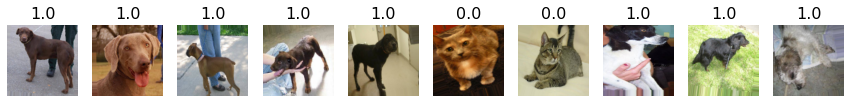

In [29]:
# this part is for seing what is the one-hot-encoding
# that define cat and dog

imgs, labels = next(train_generator)

rows = 1
cols = len(imgs)-22

f = plt.figure(figsize=(15,6))
for i in range(cols):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if labels is not None:
        sp.set_title(labels[i], fontsize=16)
    plt.imshow(imgs[i])


From the results above, we can conclude that label ***0.0*** is for ***cat*** and ***1.0*** is for ***dog***

## Define Functions

In [30]:
def model_diagnostics(history):
    """
    Function to show accuracy and loss of training and validation.
    """
    # plot accuracy
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='training')
    plt.plot(history.history['val_accuracy'], color='orange', label='validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # plot loss
    plt.subplot(212)
    plt.title('Binary Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='training')
    plt.plot(history.history['val_loss'], color='orange', label='validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [31]:
# create a model checkpoint which will create a file each time
# validation accuracy is improved.
# This will result the same file being updated with the best
# validation accuracy

def get_model_checkpoint(filepath, monitor, mode):
    """
    Function for creating a model checkpoint so that model will be saved if the
    metrics that being monitored perform better than the recent one.
    """
    return ModelCheckpoint(
        filepath=filepath, 
        monitor=monitor,
        mode=mode,
        save_best_only=True,
        verbose=2)

def get_early_stopping(monitor, patience):
    """
    Function for preventing ovefitting if the metric or loss being monitor doesn't
    improve after certain epoch (patience). 
    """
    return EarlyStopping(
      monitor=monitor, 
      patience=patience,
      verbose=2
    )

## Architecture Creation
This part will be concerning about the architecture of CNN model

### Model version 1

In [32]:
# create model architecture
def get_model(input_shape):
    tf.keras.backend.clear_session()
    return Sequential([
    Conv2D(filters=32, 
           kernel_size=(3,3), 
           activation='relu',
           input_shape=input_shape,
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=128, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=256, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=512, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=1024, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
  ]
  )

model = get_model(INPUT_SHAPE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

#### Model Callbacks

In [ ]:
# Setting parameter for model checkpoint
filepath = '/content/cnn_ver_1.h5' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 3 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

#### Model Training


In [ ]:
# compile model
epochs = 50 #@param {type: "integer"}

# compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

#train the model
history = model.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks
          )

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 0.6068 - accuracy: 0.6576
Epoch 1: val_accuracy improved from -inf to 0.71280, saving model to /content/cnn_ver_1.h5
704/704 [==============================] - 225s 318ms/step - loss: 0.6068 - accuracy: 0.6576 - val_loss: 0.5507 - val_accuracy: 0.7128
Epoch 2/50
704/704 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.7445
Epoch 2: val_accuracy improved from 0.71280 to 0.78400, saving model to /content/cnn_ver_1.h5
704/704 [==============================] - 219s 312ms/step - loss: 0.5143 - accuracy: 0.7445 - val_loss: 0.4534 - val_accuracy: 0.7840
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 0.4517 - accuracy: 0.7875
Epoch 3: val_accuracy did not improve from 0.78400
704/704 [==============================] - 218s 310ms/step - loss: 0.4517 - accuracy: 0.7875 - val_loss: 0.4488 - val_accuracy: 0.7836
Epoch 4/50
704/704 [==============================] - ETA: 0s - loss: 0

#### Model Evaluation

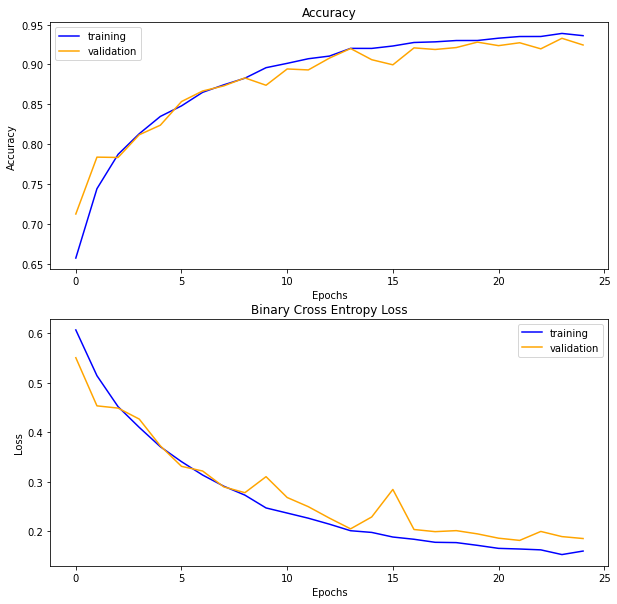

In [ ]:
model_diagnostics(history)

In [ ]:
import numpy as np
# find index of max validation accruacy
arg_index = np.argmax(history.history['val_accuracy'])
# highest performance validation accuracy and accuracy
print("accuracy = ", history.history['accuracy'][arg_index])
print("validation accuracy = ", history.history['val_accuracy'][arg_index])

accuracy =  0.9388889074325562
validation accuracy =  0.9327999949455261


Best Model for CNN created by myself is 93% training accuracy and 93% validation accuracy. 

In [ ]:
from keras.models import load_model
model = load_model('/content/cnn_ver_1.h5')

### Model version 2

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout


# create model architecture
def get_model(input_shape):
  tf.keras.backend.clear_session()
  return Sequential([


    Conv2D(filters=32, 
           kernel_size=(3,3), 
           activation='relu',
           padding='same',
           input_shape=input_shape
           ),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, 
           kernel_size=(3,3), 
           activation='relu',
           padding='same',
          ),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    
    Conv2D(filters=128, 
           kernel_size=(3,3), 
           activation='relu',
           padding='same',
           ),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=256, 
           kernel_size=(3,3), 
           activation='relu',
           padding='same',
           ),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=512, 
           kernel_size=(3,3), 
           activation='relu',
           padding='same',
           ),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
  ]
  )

model = get_model(INPUT_SHAPE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                        

#### Model Callbacks

In [ ]:
# Setting parameter for model checkpoint
filepath = '/content/cnn_ver_2.h5' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 5 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

#### Model Training

In [ ]:
# compile model
epochs = 50 #@param {type: "integer"}
 
# compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

# train the model
history = model.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks
          )



Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.7008
Epoch 1: val_accuracy improved from -inf to 0.74920, saving model to /content/cnn_ver_2.h5
704/704 [==============================] - 182s 256ms/step - loss: 0.6698 - accuracy: 0.7008 - val_loss: 0.5048 - val_accuracy: 0.7492
Epoch 2/50
704/704 [==============================] - ETA: 0s - loss: 0.4957 - accuracy: 0.7715
Epoch 2: val_accuracy improved from 0.74920 to 0.75840, saving model to /content/cnn_ver_2.h5
704/704 [==============================] - 178s 253ms/step - loss: 0.4957 - accuracy: 0.7715 - val_loss: 0.5480 - val_accuracy: 0.7584
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8056
Epoch 3: val_accuracy improved from 0.75840 to 0.84160, saving model to /content/cnn_ver_2.h5
704/704 [==============================] - 178s 253ms/step - loss: 0.4298 - accuracy: 0.8056 - val_loss: 0.3837 - val_accuracy: 0.8416
Epoch 4/50
704/704 [========

#### Model Evaluation

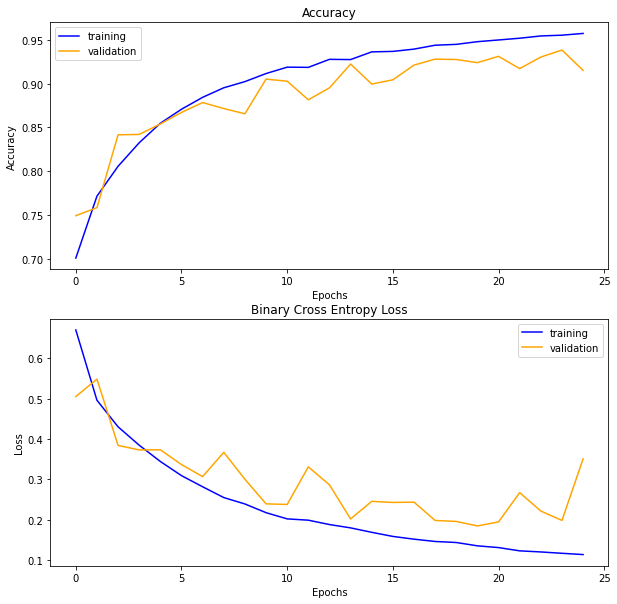

In [ ]:
model_diagnostics(history)

In [ ]:
import numpy as np
# find index of max validation accruacy
arg_index = np.argmax(history.history['val_accuracy'])
# highest performance validation accuracy and accuracy
print("accuracy = ", history.history['accuracy'][arg_index])
print("validation accuracy = ", history.history['val_accuracy'][arg_index])

accuracy =  0.9553777575492859
validation accuracy =  0.9383999705314636


Best model of this architecture is 95% accuracy and 93% validation accuracy. But the learning process is coarse and volatile

## Transfer Learning
Transfer Learning is a way of leveraging model that has been trained on millions of data. It also consist of deep and complex architecture leading to higher accuracy and results

### VGG16

#### VGG16 version 1

In [ ]:

## Loading VGG16 model
base_model = VGG16(
    weights="imagenet", 
    include_top=False, 
    input_shape=INPUT_SHAPE)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
# Adding output of the model according to our case
modified_model = Sequential([
  base_model,
  Flatten(),
  Dense(units= 1024, activation='relu'),    
  Dense(units= 1, activation='sigmoid'),                    
])

In [ ]:
# Setting parameter for model checkpoint
filepath = '/content/vgg16_ver_1.h5' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 5 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

In [ ]:
epochs = 50 #@param = {type: 'integer'}
# compile model
modified_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

#train the model
history_modified = modified_model.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks,
          )

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 0.3414 - accuracy: 0.8487
Epoch 1: val_accuracy improved from -inf to 0.87960, saving model to /content/vgg16_ver_1.h5
704/704 [==============================] - 201s 266ms/step - loss: 0.3414 - accuracy: 0.8487 - val_loss: 0.2731 - val_accuracy: 0.8796
Epoch 2/50
704/704 [==============================] - ETA: 0s - loss: 0.2695 - accuracy: 0.8837
Epoch 2: val_accuracy did not improve from 0.87960
704/704 [==============================] - 186s 264ms/step - loss: 0.2695 - accuracy: 0.8837 - val_loss: 0.2936 - val_accuracy: 0.8700
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.8932
Epoch 3: val_accuracy improved from 0.87960 to 0.89040, saving model to /content/vgg16_ver_1.h5
704/704 [==============================] - 186s 264ms/step - loss: 0.2498 - accuracy: 0.8932 - val_loss: 0.2712 - val_accuracy: 0.8904
Epoch 4/50
704/704 [==============================] - ETA: 0s - los

In [ ]:
import numpy as np
# find index of max validation accruacy
arg_index = np.argmax(history_modified.history['val_accuracy'])
# highest performance validation accuracy and accuracy
print("accuracy = ", history_modified.history['accuracy'][arg_index])
print("validation accuracy = ", history_modified.history['val_accuracy'][arg_index])

accuracy =  0.9220444560050964
validation accuracy =  0.9120000004768372


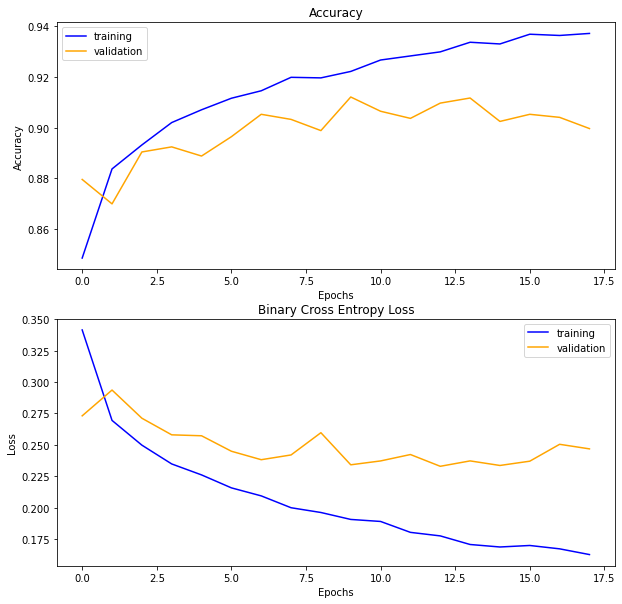

In [ ]:
model_diagnostics(history_modified)

So far the model performed quite well with best training accuracy of 92% and best validation accuracy 91%. But there's gap that might indicate an overfitting.

#### VGG16 version 2

In [34]:
from keras import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
# Adding output of the model according to our case
modified_model = Sequential([
  base_model,
  Flatten(),
  Dense(units= 1024, activation='relu'),
  Dropout(0.5),
  Dense(units= 1024, activation='relu'),
  Dropout(0.5),
  Dense(units= 1, activation='sigmoid'),                    
])
modified_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              8389632   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [35]:
# Setting parameter for model checkpoint
filepath = '/content/vgg16_ver_2.h5' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 5 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

In [36]:
epochs = 50 #@param = {type: 'integer'}
# compile model
modified_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

#train the model
history_modified = modified_model.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks,
          )

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 0.3839 - accuracy: 0.8281
Epoch 1: val_accuracy improved from -inf to 0.87240, saving model to /content/vgg16_ver_2.h5
704/704 [==============================] - 188s 266ms/step - loss: 0.3839 - accuracy: 0.8281 - val_loss: 0.2866 - val_accuracy: 0.8724
Epoch 2/50
704/704 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8712
Epoch 2: val_accuracy improved from 0.87240 to 0.88000, saving model to /content/vgg16_ver_2.h5
704/704 [==============================] - 186s 264ms/step - loss: 0.3051 - accuracy: 0.8712 - val_loss: 0.2786 - val_accuracy: 0.8800
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 0.2939 - accuracy: 0.8800
Epoch 3: val_accuracy did not improve from 0.88000
704/704 [==============================] - 185s 263ms/step - loss: 0.2939 - accuracy: 0.8800 - val_loss: 0.2991 - val_accuracy: 0.8708
Epoch 4/50
704/704 [==============================] - ETA: 0s - los

In [37]:
# find index of max validation accruacy
arg_index = np.argmax(history_modified.history['val_accuracy'])
# highest performance validation accuracy and accuracy
print("accuracy = ", history_modified.history['accuracy'][arg_index])
print("validation accuracy = ", history_modified.history['val_accuracy'][arg_index])

accuracy =  0.8846222162246704
validation accuracy =  0.8903999924659729


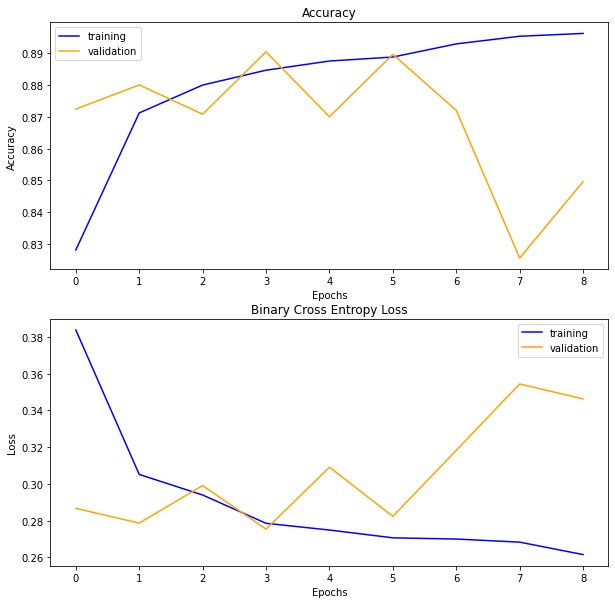

In [38]:
model_diagnostics(history_modified)

Achieved 88% accuracy and 89% validation accuracy.

# Export Model
We will be using the 'cnn_ver_1.h5' file and then export it as kaggle.json

In [11]:
from keras.models import load_model
import tensorflowjs as tfjs

for model_path in os.listdir(os.path.join(os.getcwd(), 'models')):
    model_name = model_path.split('.')[0]
    model_path = os.path.join(os.getcwd(), 'models', model_path)
    export_path = os.path.join(os.getcwd(), 'js_models', model_name)
    print(f"Exporting {model_name} ... to {export_path}")
    loaded_model = load_model(model_path)
    tfjs.converters.save_keras_model(loaded_model, export_path)

Exporting cnn_ver_1 ... to C:\Users\Asus\Documents\dogs-vs-cats-model\js_models\cnn_ver_1
Exporting cnn_ver_2 ... to C:\Users\Asus\Documents\dogs-vs-cats-model\js_models\cnn_ver_2
Exporting vgg16_ver_1 ... to C:\Users\Asus\Documents\dogs-vs-cats-model\js_models\vgg16_ver_1
Exporting vgg16_ver_2 ... to C:\Users\Asus\Documents\dogs-vs-cats-model\js_models\vgg16_ver_2
